# Tutorial Objective: How To Create INSET/ZOOM Plot from Astronomical FITS Image?

### Step-1: Download SDSS FITS image file

## LINK: https://youtu.be/aS2SUp6qetE

### Step-2: import required library

In [1]:
import numpy as np # deals with nums and arrays
import matplotlib.pyplot as plt #-------data visualization
from astropy.io import fits #----------fits file handling
from mpl_toolkits.axes_grid1.inset_locator import inset_axes,mark_inset # ---inset plotting

### step-3: Read FITS image file

In [2]:
file=fits.open('r.fits')  # reads fits file

# etract fits file information
file.info()


Filename: r.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      19   (1536, 557)   float32   


In [3]:
# file header information
file[0].header

SIMPLE  =                    T / Fits Standard                                  
BITPIX  =                  -32 / Bits per pixel                                 
NAXIS   =                    2 / Number of axes                                 
NAXIS1  =                 1536 / Axis Length                                    
NAXIS2  =                  557 / Axis Length                                    
OBJECT  = '22 N    '                                                            
CRPIX1  =           750.440373 / Reference pixel on axis 1                      
CRPIX2  =           552.754501 / Reference pixel on axis 2                      
CRVAL1  =   28.777849253498957 / Value at ref. pixel on axis 1                  
CRVAL2  =   167.86359550699535 / Value at ref. pixel on axis 2                  
CTYPE1  = 'DEC--TAN'           / Type of co-ordinate on axis 1                  
CTYPE2  = 'RA---TAN'           / Type of co-ordinate on axis 2                  
CD1_1   = 0.0001876203394740

### Step-4: Extract image data

In [4]:
image_data=file[0].data
image_data, image_data.shape

(array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]], dtype='>f4'),
 (557, 1536))

### Step-5: Plot & visualize image data

C:\Users\JPrakash\AppData\Local\Temp\ipykernel_3560\1399294832.py:2: RuntimeWarning: invalid value encountered in log10
  ax.imshow(np.log10(image_data),origin='lower',cmap='jet')


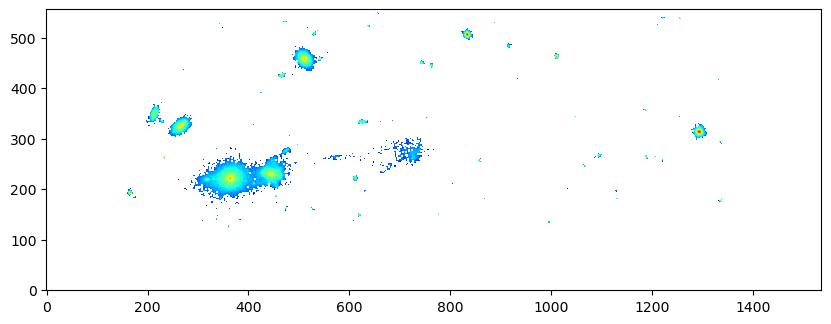

In [5]:
fig,ax=plt.subplots(figsize=(10,5))
ax.imshow(np.log10(image_data),origin='lower',cmap='jet')
plt.show()

### Step-6: Define the inset region, inset location, size 

C:\Users\JPrakash\AppData\Local\Temp\ipykernel_3560\2235418657.py:2: RuntimeWarning: invalid value encountered in log10
  ax.imshow(np.log10(image_data),origin='lower',cmap='jet')
C:\Users\JPrakash\AppData\Local\Temp\ipykernel_3560\2235418657.py:10: RuntimeWarning: invalid value encountered in log10
  ax.imshow(np.log10(image_data),origin='lower',cmap='jet')
C:\Users\JPrakash\AppData\Local\Temp\ipykernel_3560\2235418657.py:11: RuntimeWarning: invalid value encountered in log10
  ax_inset.imshow(np.log10(image_data),origin='lower',cmap='jet')


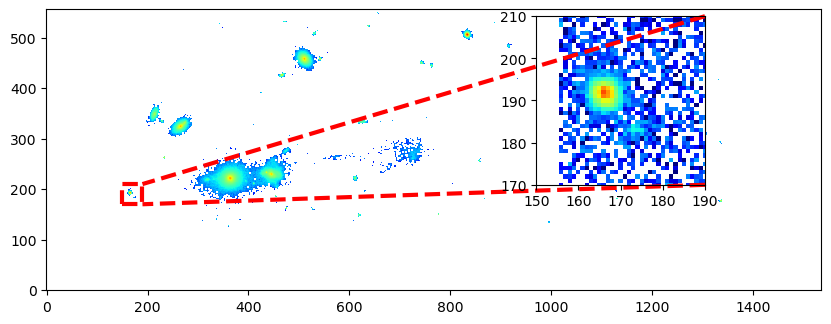

In [6]:
fig,ax=plt.subplots(figsize=(10,5))
ax.imshow(np.log10(image_data),origin='lower',cmap='jet')
ax_inset=inset_axes(ax,width='50%',height='60%',loc='upper right')
#choose inset region
xc,yc=170,190
box_size=20
x1,x2=xc-box_size,xc+box_size
y1,y2=yc-box_size,yc+box_size
x1,x2,y1,y2
ax.imshow(np.log10(image_data),origin='lower',cmap='jet')
ax_inset.imshow(np.log10(image_data),origin='lower',cmap='jet')
ax_inset.set_xlim(x1,x2)
ax_inset.set_ylim(y1,y2)


mark_inset(ax,ax_inset,loc1=1,loc2=4,fc='none',ec='r',lw=3,ls='--')
plt.show()


### Step-7:  Plot the zoomed-in region in the inset


In [7]:

ax.imshow(np.log10(image_data),origin='lower',cmap='jet')
ax_inset.imshow(np.log10(image_data),origin='lower',cmap='jet')
ax_inset.set_xlim(x1,x2)
ax_inset.set_ylim(y1,y2)




C:\Users\JPrakash\AppData\Local\Temp\ipykernel_3560\1477923056.py:1: RuntimeWarning: invalid value encountered in log10
  ax.imshow(np.log10(image_data),origin='lower',cmap='jet')
C:\Users\JPrakash\AppData\Local\Temp\ipykernel_3560\1477923056.py:2: RuntimeWarning: invalid value encountered in log10
  ax_inset.imshow(np.log10(image_data),origin='lower',cmap='jet')


(170.0, 210.0)

### Step-8: Mark the zoomed region on the main plot

In [8]:
mark_inset(ax,ax_inset,loc1=1,loc2=3,fc='none',ec='k')
plt.show()


### Step-9: Create multiple regions inset/Zoom Plot of FITS image

C:\Users\JPrakash\AppData\Local\Temp\ipykernel_3560\595265459.py:18: RuntimeWarning: invalid value encountered in log10
  ax.imshow(np.log10(image_data),origin='lower',cmap='jet')
C:\Users\JPrakash\AppData\Local\Temp\ipykernel_3560\595265459.py:19: RuntimeWarning: invalid value encountered in log10
  ax_inset.imshow(np.log10(image_data),origin='lower',cmap='jet')


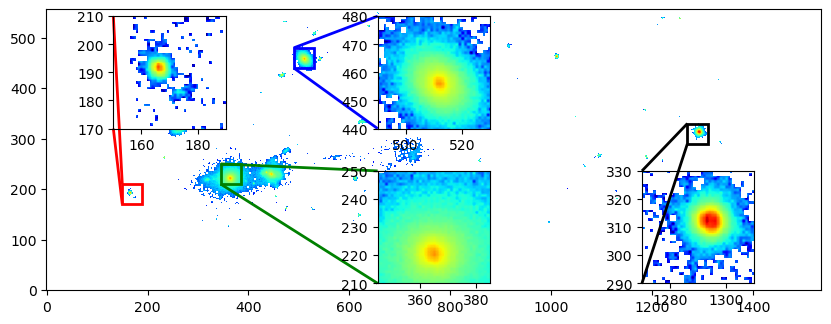

In [9]:
fig,ax=plt.subplots(figsize=(10,5))
#ax.imshow(np.log10(image_data),origin='lower',cmap='jet')
#ax_inset=inset_axes(ax,width='50%',height='60%',loc='upper right')
#choose  4 inset region
regions=[(170,190),(365,230),(510,460),(1290,310)]# (xc,yc)

#xc,yc=170,190
box_sizes=np.array([20,50,30,25])
inset_locations=['upper left','lower center','upper center','lower right']
edge_colors=['r','g','b','k']

# use for loop 
for i,((xc,yc),box_sizes,inset_locations,edge_colors) in enumerate(zip(regions,box_sizes,inset_locations,edge_colors)):
    x1,x2=xc-box_size,xc+box_size
    y1,y2=yc-box_size,yc+box_size
#x1,x2,y1,y2
    ax_inset=inset_axes(ax,width='30%',height='40%',loc=inset_locations)
    ax.imshow(np.log10(image_data),origin='lower',cmap='jet')
    ax_inset.imshow(np.log10(image_data),origin='lower',cmap='jet')
    #ax_inset=inset_axes(ax,width='40%',height='60%',loc=inset_locations)
    ax_inset.set_xlim(x1,x2)
    ax_inset.set_ylim(y1,y2)


    mark_inset(ax,ax_inset,loc1=3,loc2=2,fc='none',ec=edge_colors,lw=2,ls='solid')
    
plt.show()
